# Electric Vehicle Sales Forecasting Project

## Project Objective

The objective of this project is to analyze annual electric vehicle (EV) sales figures and predict future sales volumes. Given the growing popularity of electric vehicles and the increasing demand for sustainable transportation solutions, these forecasts are essential for understanding the future of the EV industry and supporting investment decisions.

In this project, we aim to use time series analysis and regression models based on historical annual sales data to predict the number of electric vehicles that will be sold in the coming years.


### import the necessary packages

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("Electric_Vehicle_Population_Data.csv")

### EDA

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
df.shape

(177866, 17)

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
df= df.dropna()

+ Missing values were removed using `dropna` since there were only a few.


### data visualization 

**Vehicle Distribution**


In [11]:
vehicle_type_counts = df['Electric Vehicle Type'].value_counts()

In [ ]:
plt.figure(figsize=(4, 4))
vehicle_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('distribution of electric vehicle types')
plt.ylabel('') 
plt.show()

**Distribution by Brands**


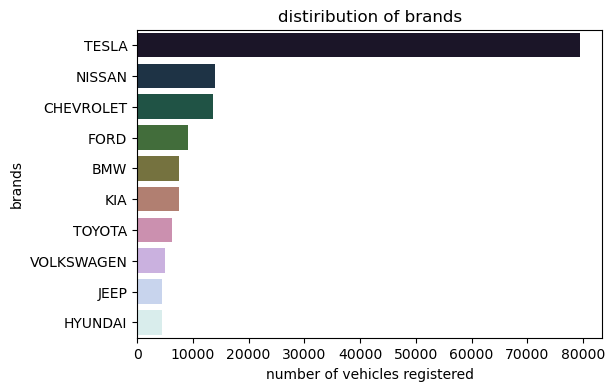

In [46]:
make_distr= df["Make"].value_counts().head(10)

plt.figure(figsize=(6,4))
sns.barplot(x= make_distr.values, y=make_distr.index, palette= "cubehelix")
plt.title("distiribution of brands")
plt.xlabel("number of vehicles registered")
plt.ylabel("brands")
plt.show()

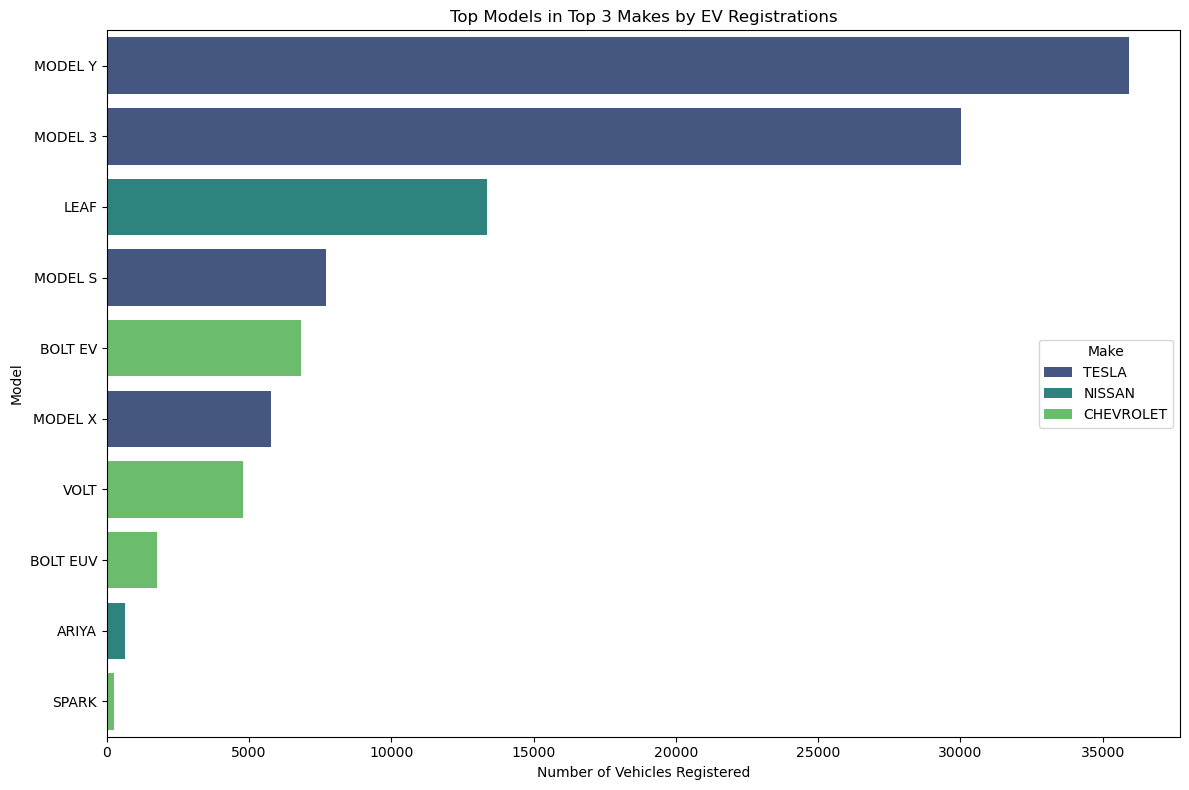

In [57]:
top_3_makes= make_distr.head(3).index

top_makes_data = df[df["Make"].isin(top_3_makes)]


model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_models = model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

**Distribution by locations**

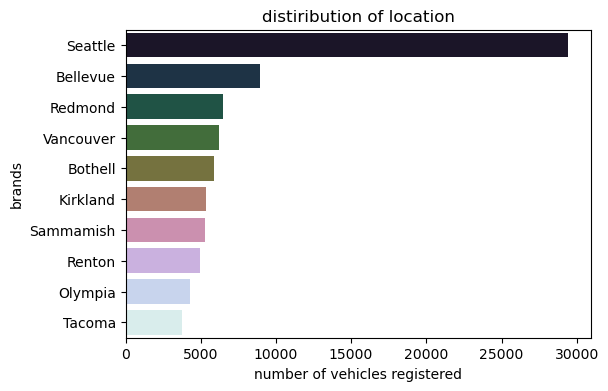

In [42]:
city_distr= df["City"].value_counts().head(10)

plt.figure(figsize=(6,4))
sns.barplot(x= city_distr.values, y=city_distr.index, palette= "cubehelix")
plt.title("distiribution of location")
plt.xlabel("number of vehicles registered")
plt.ylabel("brands")
plt.show()

**Adoption Over Time**

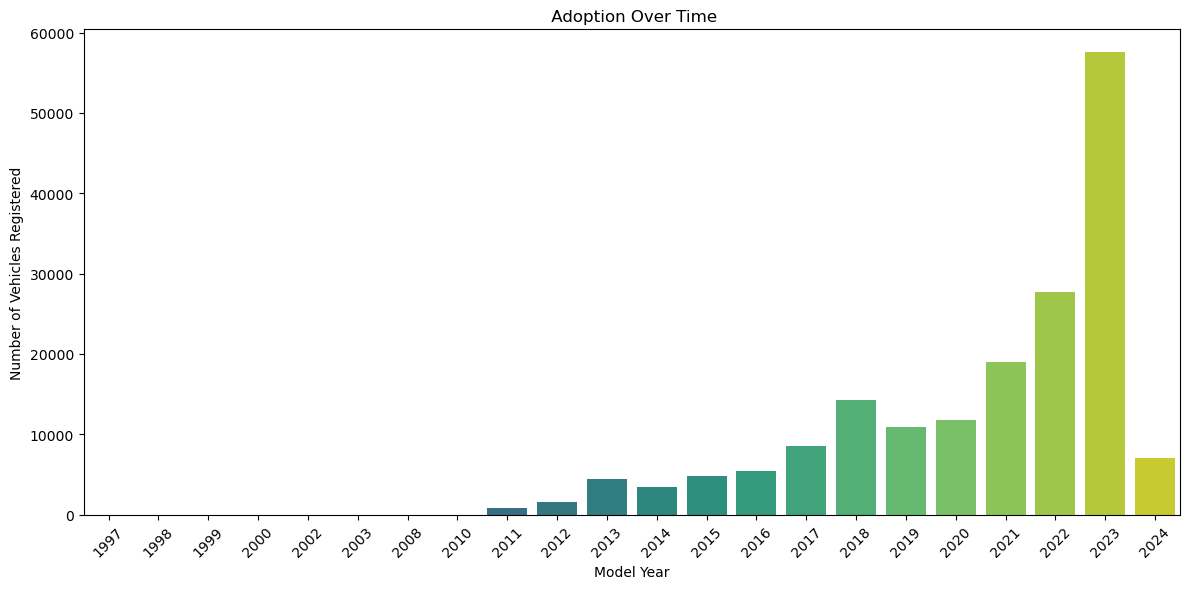

In [35]:
plt.figure(figsize=(12, 6))
df_adoption_by_year = df['Model Year'].value_counts().sort_index()
sns.barplot(x=df_adoption_by_year.index, y=df_adoption_by_year.values, palette="viridis")
plt.title(' Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**distrubiton by electric range(miles)**

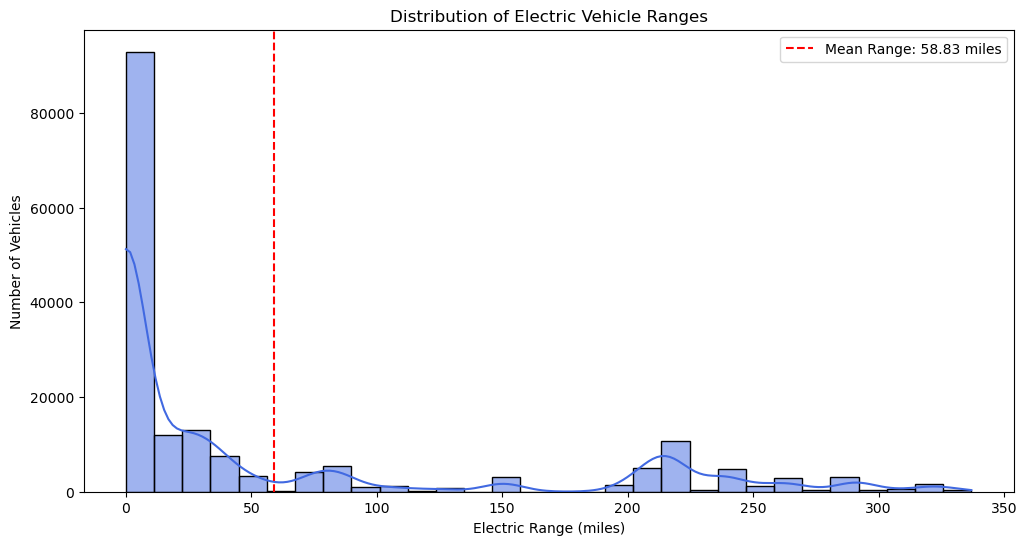

In [55]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

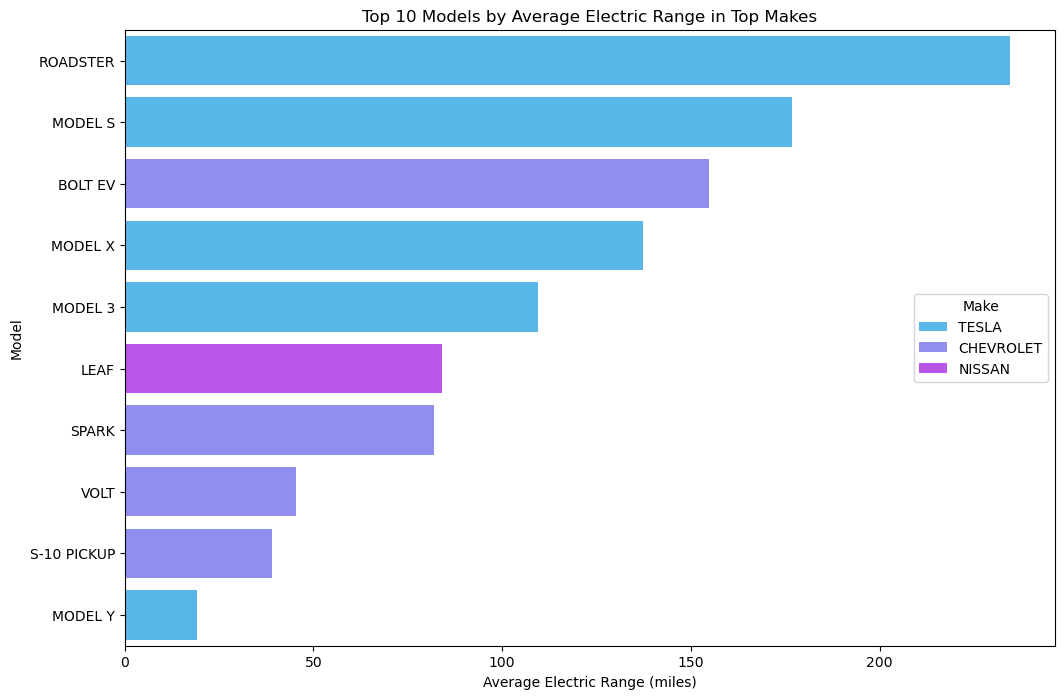

In [59]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

**distribution by model year**

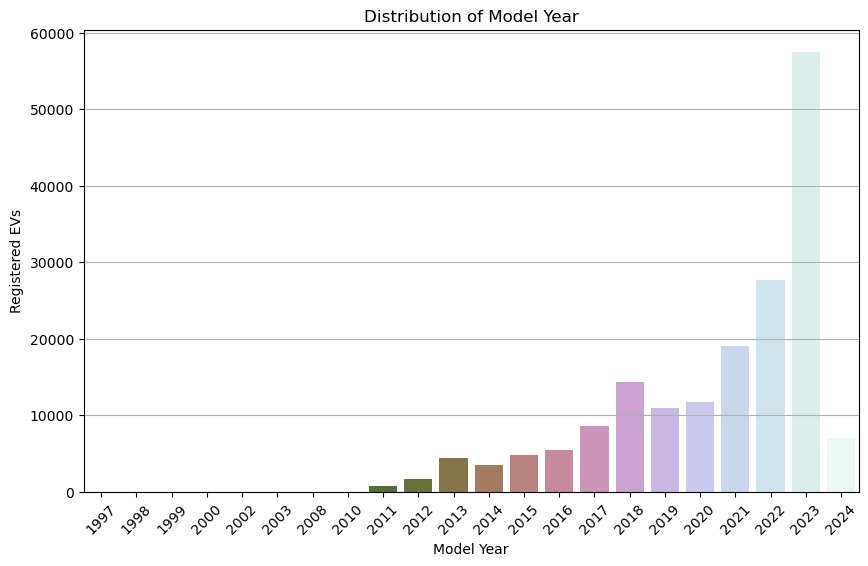

In [81]:
ev_count = df["Model Year"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_count.index, y=ev_count.values, palette="cubehelix")
plt.title("Distribution of Model Year")
plt.xlabel("Model Year")
plt.ylabel("Registered EVs")
plt.xticks(rotation=45)  
plt.grid(axis="y")       
plt.show()

### model predict

In [100]:
ev_counts= df.groupby("Model Year").size()
ev_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
dtype: int64

+ In 2021, there were 19,063 EVs registered.
+ In 2022, the number increased to 27708 EVs.
+ In 2023, a significant jump to 57,519 EVs was observed.
+ For 2024, currently, 7,072 EVs are registered, which suggests partial data.

In [108]:
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_counts[ev_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


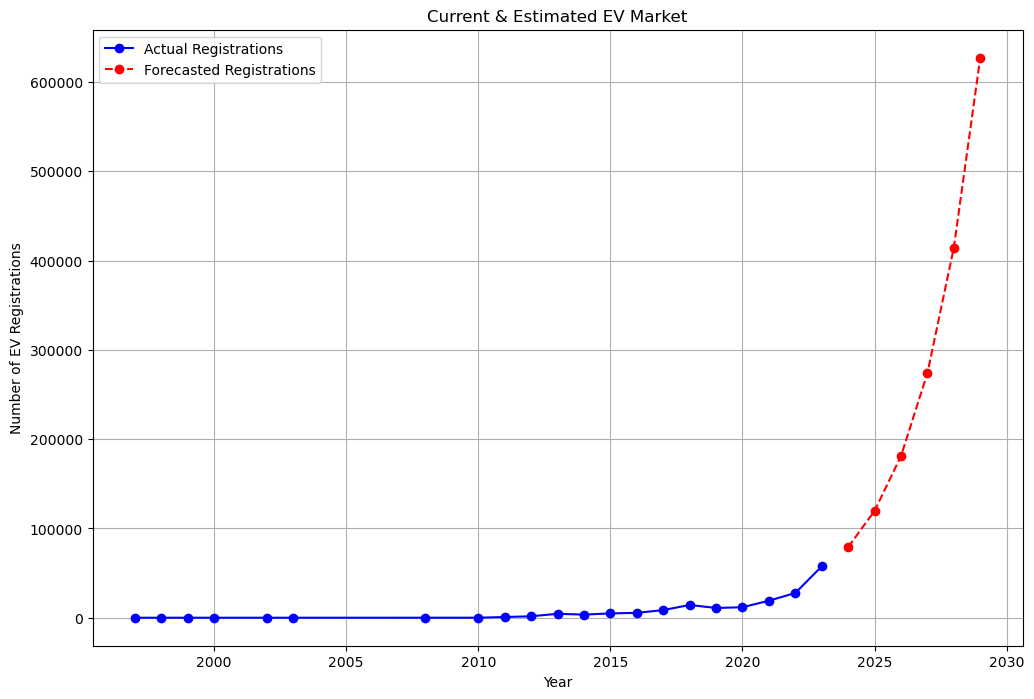

In [110]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

## Results

The graph above displays the **current and forecasted market** for electric vehicles (EVs) based on historical registration data and predictive modeling.

- **Actual Registrations (1997-2024)**: Represented by the blue line, the actual registration data shows a gradual increase in EV sales up to around 2020, followed by a noticeable growth in recent years. This upward trend reflects a growing interest and adoption of electric vehicles in recent times.

- **Forecasted Registrations (2025-2030)**: Shown by the red dashed line, the forecast suggests a rapid exponential growth in EV registrations over the next few years. By 2030, EV sales are projected to reach over 600,000 registrations annually, indicating a major shift towards electric mobility.

### Key Insights

1. **Exponential Growth in EV Sales**: The projected data points to an accelerating demand for electric vehicles, likely driven by technological advancements, environmental awareness, and supportive government policies.

2. **Future Market Potential**: The forecast underscores a vast potential for the EV market, with sales expected to increase significantly within the next decade. This insight can guide investments, resource allocation, and policy decisions within the electric vehicle industry.

3. **Market Transition**: The anticipated sharp rise in EV registrations suggests a critical transition in the automotive market, as consumers increasingly move away from conventional vehicles to electric alternatives.

These results provide valuable insights into the future trajectory of electric vehicle adoption, with a strong indication that EVs will become a dominant force in the automotive sector by 2030.
